In [1]:
import pandas as pd 
import folium as folium
import numpy as np
from geographiclib.geodesic import Geodesic
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fields.csv")
df.sample(10)

,operator,field,latitude,longitude,vessels,type
26,STARDEEP,Agbami,3.46261,5.56050,Starz Investment,AHTS
35,Esso,Erha & Usan,3.60676,7.39318,Homeland Integrated Offshore Services Ltd,FSV
7,SNEPCO,Bonga,4.55750,4.61635,EA TEMILE & SONS,LARGE PSV
40,Esso,Erha & Usan,3.60676,7.39318,AfrikDelta Marine Ltd,60T
19,TUPNI,Egina & Akpo,3.05028,6.69731,Marine Platforms,OIMR
20,STARDEEP,Agbami,3.46261,5.56050,Awaritse Nig Ltd and Ocean Explorers,Intermix
17,TUPNI,Egina & Akpo,3.05028,6.69731,MULTIPLAN,Security Vessel
1,SNEPCO,Bonga,4.55750,4.61635,MV Charis or A-100,PSV
12,TUPNI,Egina & Akpo,3.05028,6.69731,TEMILE,Medium PSV
30,Esso,Erha & Usan,5.35641,4.34207,ERDIS Nigeria Ltd,Medium PSV


In [3]:
df_copy = df.copy()

In [4]:
# Count unique values in the data
df_copy['type'].value_counts()


FSV                                        6
Medium PSV                                 5
Security Vessel                            4
Crew Boat                                  3
PSV                                        3
AHTS                                       3
Terminal Tug                               2
FMMV Security Vessel                       2
PC                                         1
83T                                        1
109T/90T                                   1
Large MPSV (GT 18006) -  Lewek Crusader    1
Subsea Intervention                        1
OIMR                                       1
Intermix                                   1
MID-SIZE PSV                               1
Fast Crew Boat                             1
ANCHOR HANDLING TUG                        1
PERSONNEL CARRIER                          1
LARGE PSV                                  1
60T                                        1
Name: type, dtype: int64

In [5]:
vessel_color = {"FSV": "blue",            
                "Medium PSV": "red",                                
                "Security Vessel": "purple",                         
                "Crew Boat": "orange",                                
                "PSV": "green",
                "AHTS": "aqua",
                "Terminal Tug":"black",                               
                "FMMV Security Vessel": "fuchsia",                     
                "PC": "maroon",                                    
                "83T": "lime",
                "109T/90T": "navy",
                "Large MPSV (GT 18006) -  Lewek Crusader": "teal",
                "Subsea Intervention": "olive",   
                "OIMR":"coral",
                "Intermix":"cyan",
                "MID-SIZE PSV": "crimson",
                "Fast Crew Boat": "gold",
                "ANCHOR HANDLING TUG": "magenta",
                "PERSONNEL CARRIER": "peru",
                "LARGE PSV": "yellow",
                "60T": "slateblue"
                }

In [6]:
coord = {'Bonga-lat': 4.5575,
        'Bonga-lon': 4.616350,
        "Agbami-lat": 3.46261,
        "Agbami-lon": 5.5605,
        "Erha & Usan1-lat": 5.35641,
        "Erha & Usan1-lon": 4.34207,
        "Erha & Usan2-lat": 3.60676,
        "Erha & Usan2-lon": 7.39318,
        "Egina & Akpo-lat": 3.05028,
        "Egina & Akpo-lon": 6.69731
        }

In [7]:
bonga = df_copy.query('latitude == 4.5575')
agbami = df_copy.query('latitude == 3.46261')
eginaakpo = df_copy.query('latitude == 3.05028')
erhausan1 = df_copy.query('latitude == 5.35641')
erhausan2 = df_copy.query('latitude == 3.60676')

In [8]:
geod = Geodesic.WGS84
angles = [0, 30, 45, 90, 180, 270]

def offset_fn(lat, lon, offset=5000):
    theta = np.random.choice(angles)
    az = theta - 90
    g = geod.Direct(lat, lon, az, offset)
    return g   

In [9]:
# For Bonga
new_bonga_lat = []
new_bonga_lon = []

for i in range(0,len(bonga)):
    new = offset_fn(coord['Bonga-lat'], coord['Bonga-lon'])
    new_bonga_lat.append(new['lat2'])
    new_bonga_lon.append(new['lon2'])
    coord['Bonga-lat'] = new['lat2']
    coord['Bonga-lon'] = new['lon2']

bonga.loc[:, ('newlat')] = new_bonga_lat 
bonga.loc[:, ('newlon')] = new_bonga_lon

# Average lat and lon for Bonga
avg_bonga_lat = bonga['newlat'].median()
avg_bonga_lon = bonga['newlon'].median()

/tmp/ipykernel_224/2413531905.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bonga.loc[:, ('newlat')] = new_bonga_lat
/tmp/ipykernel_224/2413531905.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bonga.loc[:, ('newlon')] = new_bonga_lon


In [10]:
# For Agbami
new_agbami_lat = []
new_agbami_lon = []

for i in range(0,len(agbami)):
    new = offset_fn(coord['Agbami-lat'], coord['Agbami-lon'])
    new_agbami_lat.append(new['lat2'])
    new_agbami_lon.append(new['lon2'])
    coord['Agbami-lat'] = new['lat2']
    coord['Agbami-lon'] = new['lon2']

    
agbami.loc[:, ('newlat')] = new_agbami_lat
agbami.loc[:, ('newlon')] = new_agbami_lon

# Average lat and lon for Agbami
avg_agbami_lat = agbami['newlat'].median()
avg_agbami_lon = agbami['newlon'].median()

/tmp/ipykernel_224/2289583162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agbami.loc[:, ('newlat')] = new_agbami_lat
/tmp/ipykernel_224/2289583162.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agbami.loc[:, ('newlon')] = new_agbami_lon


In [11]:
# For Egina&Akpo
new_eginaakpo_lat = []
new_eginaakpo_lon = []

for i in range(0,len(eginaakpo)):
    new = offset_fn(coord['Egina & Akpo-lat'], coord['Egina & Akpo-lon'])
    new_eginaakpo_lat.append(new['lat2'])
    new_eginaakpo_lon.append(new['lon2'])
    coord['Egina & Akpo-lat'] = new['lat2']
    coord['Egina & Akpo-lon'] = new['lon2']

    
eginaakpo.loc[:, ('newlat')] = new_eginaakpo_lat
eginaakpo.loc[:, ('newlon')] = new_eginaakpo_lon

# Average lat and lon for EginaAkpo
avg_eginaakpo_lat = eginaakpo['newlat'].median()
avg_eginaakpo_lon = eginaakpo['newlon'].median()

/tmp/ipykernel_224/3617272745.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eginaakpo.loc[:, ('newlat')] = new_eginaakpo_lat
/tmp/ipykernel_224/3617272745.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eginaakpo.loc[:, ('newlon')] = new_eginaakpo_lon


In [12]:
# For ErhaUsan1
new_erhausan1_lat = []
new_erhausan1_lon = []

for i in range(0,len(erhausan1)):
    new = offset_fn(coord['Erha & Usan1-lat'], coord['Erha & Usan1-lon'])
    new_erhausan1_lat.append(new['lat2'])
    new_erhausan1_lon.append(new['lon2'])
    coord['Erha & Usan1-lat'] = new['lat2']
    coord['Erha & Usan1-lon'] = new['lon2']

    
erhausan1['newlat'] = new_erhausan1_lat
erhausan1['newlon'] = new_erhausan1_lon

# Average lat and lon for ErhaUsan1
avg_erhausan1_lat = erhausan1['newlat'].median()
avg_erhausan1_lon = erhausan1['newlon'].median()

/tmp/ipykernel_224/2858047762.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erhausan1['newlat'] = new_erhausan1_lat
/tmp/ipykernel_224/2858047762.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erhausan1['newlon'] = new_erhausan1_lon


In [13]:
# For ErhaUsan2
new_erhausan2_lat = []
new_erhausan2_lon = []

for i in range(0,len(erhausan2)):
    new = offset_fn(coord['Erha & Usan2-lat'], coord['Erha & Usan2-lon'])
    new_erhausan2_lat.append(new['lat2'])
    new_erhausan2_lon.append(new['lon2'])
    coord['Erha & Usan2-lat'] = new['lat2']
    coord['Erha & Usan2-lon'] = new['lon2']

    
erhausan2.loc[:, ('newlat')] = new_erhausan2_lat
erhausan2.loc[:, ('newlon')] = new_erhausan2_lon

# Average lat and lon for ErhaUsan2
avg_erhausan2_lat = erhausan2['newlat'].median()
avg_erhausan2_lon = erhausan2['newlon'].median()

/tmp/ipykernel_224/2622219546.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erhausan2.loc[:, ('newlat')] = new_erhausan2_lat
/tmp/ipykernel_224/2622219546.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erhausan2.loc[:, ('newlon')] = new_erhausan2_lon


In [14]:
merged_df_copy= pd.concat([agbami, erhausan2, erhausan1, eginaakpo, bonga])

In [15]:
merged_df_copy.sample(10)

,operator,field,latitude,longitude,vessels,type,newlat,newlon
34,Esso,Erha & Usan,5.35641,4.34207,Hamilton Technologies,FSV,5.316678,4.246378
13,TUPNI,Egina & Akpo,3.05028,6.69731,PETROMARINE,Medium PSV,3.104859,6.626548
38,Esso,Erha & Usan,3.60676,7.39318,E.A Temile & Sons Devmt Co. Nig Ltd,109T/90T,3.606758,7.393180
14,TUPNI,Egina & Akpo,3.05028,6.69731,STRICKLAND,Security Vessel,3.127467,6.587592
12,TUPNI,Egina & Akpo,3.05028,6.69731,TEMILE,Medium PSV,3.082251,6.665503
16,TUPNI,Egina & Akpo,3.05028,6.69731,HOMELAND,Security Vessel,3.159439,6.600767
26,STARDEEP,Agbami,3.46261,5.56050,Starz Investment,AHTS,3.394780,5.521530
31,Esso,Erha & Usan,5.35641,4.34207,Tamrose Ventures Ltd,Medium PSV,5.297952,4.310170
1,SNEPCO,Bonga,4.55750,4.61635,MV Charis or A-100,PSV,4.467069,4.616350
5,SNEPCO,Bonga,4.55750,4.61635,UTAI 8,PC,4.467066,4.616350


In [16]:
# Find the highest and lowest values in the latitude column
max_lat = merged_df_copy['newlat'].max()
min_lat = merged_df_copy['newlat'].min()

# Find the highest and lowest values in the longitude column
max_long = merged_df_copy['newlon'].max()
min_long = merged_df_copy['newlon'].min()

In [17]:
# Create a base map
maps = folium.Map(location=[(max_lat+min_lat)/2, (max_long+min_long)/2], zoom_start=8)

In [18]:
# add marker one by one on the map
for i in range(0,len(merged_df_copy)):
    html=f"""
        <div style="font-family:serif; padding:2px; text-align:center; line-height:1.2; font-size:13px">
        <h3>{merged_df_copy.iloc[i]['field']}</h3>
        <p>Vessel Deatils</p>
		<p>{merged_df_copy.iloc[i]['vessels']} Vessel</p>
        <ul style="text-align:left">
            <li>Field Name: {merged_df_copy.iloc[i]['field']}</li>
			<li>Type: {merged_df_copy.iloc[i]['type']}</li>
			<li>Operator: {merged_df_copy.iloc[i]['operator']}</li>
        </ul>
        </p>
        </div>
        """
    iframe = folium.IFrame(html=html, width=220, height=220)
    popup = folium.Popup(iframe, max_width=3000)
    folium.Marker(
        location=[merged_df_copy.iloc[i]['newlat'], merged_df_copy.iloc[i]['newlon']],
        popup=popup,
        tooltip=merged_df_copy.iloc[i]['field'],
        icon=folium.DivIcon(html=f"""
            <div >
			<svg version="1.1" id="Capa_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="35" height="35" x="0px" y="0px" fill={vessel_color[merged_df_copy.iloc[i]['type']]}
	 		viewBox="0 0 415.482 415.482" style="enable-background:new 0 0 415.482 415.482;" xml:space="preserve">
			<g>
			<path d="M92.15,326.436c2.425-1.113,4.775-2.488,6.99-4.12c3.794-2.794,6.953-6.919,10.297-11.287
			c0.752-0.982,1.503-1.963,2.262-2.931c1.584-2.02,3.954-3.267,6.515-3.43c0.19-0.012,0.379-0.018,0.568-0.018
			c2.361,0,4.637,0.93,6.328,2.6c0.957,0.947,1.907,1.906,2.858,2.868c4.877,4.929,9.484,9.585,14.924,12.108
			c4.751,2.206,10.081,3.42,15.005,3.42c2.636,0,5.086-0.347,7.282-1.03c0.053-0.017,0.106-0.032,0.16-0.048
			c5.067-1.477,8.624-3.115,11.532-5.316c3.967-3.002,7.163-6.596,9.5-10.68l7.33-12.81l1.852-3.235
			c1.595-2.787,4.553-4.513,7.764-4.529c0.016,0,0.031,0,0.047,0c3.192,0,6.148,1.692,7.764,4.448l2.349,4.013
			c0.915,1.562,1.812,3.164,2.679,4.713c3.162,5.649,6.431,11.49,10.574,15.242c0.022,0.021,0.045,0.041,0.068,0.063
			c5.872,5.429,13.929,8.801,21.027,8.801c0.146,0,0.293-0.002,0.455-0.004c7.809-0.138,14.41-2.129,20.181-6.088
			c3.539-2.427,6.793-5.909,10.239-9.596c1.079-1.155,2.195-2.35,3.328-3.518c1.699-1.751,4.032-2.732,6.459-2.732
			c0.159,0,0.319,0.004,0.479,0.013c2.597,0.138,5.007,1.393,6.61,3.44c0.876,1.121,1.741,2.259,2.607,3.4
			c2.035,2.681,3.96,5.216,6.011,7.457c4.327,4.324,8.577,7.21,13.364,9.078c2.345,0.916,4.937,1.543,7.686,1.978
			c6.107,0.966,10.3,0.074,12.786-0.462c4.745-1.025,9.263-2.965,13.065-5.609c4.001-2.783,7.44-6.548,11.079-10.533l0.54-0.591
			c1.711-1.872,4.125-2.928,6.642-2.928c0.222,0,0.445,0.009,0.668,0.024c2.753,0.205,5.26,1.662,6.8,3.953l0.73,1.088
			c1.745,2.603,3.425,5.1,5.232,7.357l32.697-95.468H0L92.15,326.436z M93.241,246.337h20.5v9.75h-20.5V246.337z M80.741,246.337
			v9.75h-20.5v-9.75H80.741z"/>
			<path d="M387.482,162.047c-2.775,0-5.697,0-8.741,0v-16.762v-10.948v-30.544c-24.919,0-53.486,0-80.245,0v-22.5h31.5
			c2.624,0,4.75-2.126,4.75-4.75c0-2.623-2.126-4.75-4.75-4.75h-31.5v-0.666c0-4.419-3.582-8-8-8c-4.418,0-8,3.581-8,8v0.666h-31.5
			c-2.624,0-4.75,2.127-4.75,4.75c0,2.624,2.126,4.75,4.75,4.75h31.5v22.5c-43.984,0-79.5,0-79.5,0l-24.661,30.544
			c-9.681,0-15.339,0-15.339,0l-25.044,27.71c-12.825,0-20.452,0-20.452,0L80,207.539h335.482L387.482,162.047z M155.496,190.416h-30
			V179.17h30V190.416z M174.741,149.459h30v11.246h-30V149.459z M205.496,190.416h-30V179.17h30V190.416z M216.741,118.916h30v11.246
			h-30V118.916z M224.741,149.459h30v11.246h-30V149.459z M255.496,190.416h-30V179.17h30V190.416z M266.741,118.916h30v11.246h-30
			V118.916z M274.741,149.459h30v11.246h-30V149.459z M305.496,190.416h-30V179.17h30V190.416z M316.741,118.916h30v11.246h-30
			V118.916z M324.741,149.459h30v11.246h-30V149.459z M355.496,190.416h-30V179.17h30V190.416z"/>
			<path d="M378.785,328.756c-3.681-3.795-6.492-8.141-9.43-12.51c-4.125,4.514-8.075,8.93-13.123,12.441
			c-4.884,3.397-10.497,5.764-16.304,7.018c-3.589,0.773-8.737,1.504-15.968,0.572c-3.318-0.428-6.558-1.283-9.677-2.502
			c-6.449-2.516-11.74-6.357-16.594-11.236c-3.32-3.604-6.188-7.682-9.203-11.535c-4.737,4.883-9.309,10.408-14.936,14.268
			c-7.578,5.199-16.05,7.504-25.113,7.664c-0.204,0.004-0.409,0.006-0.613,0.006c-9.876,0-19.999-4.594-27.137-11.193
			c-6.524-5.908-10.577-14.566-14.977-22.076c-0.782-1.338-1.564-2.674-2.348-4.01c-3.061,5.348-6.121,10.693-9.181,16.043
			c-3.025,5.287-7.038,9.723-11.881,13.387c-4.376,3.313-9.235,5.264-14.446,6.781c-3.179,0.99-6.552,1.438-9.958,1.438
			c-6.516,0-13.154-1.639-18.795-4.256c-8.121-3.77-14.065-10.555-20.321-16.74c-4.393,5.602-8.506,11.641-14.305,15.912
			c-7.742,5.703-17.218,9.18-26.868,9.18c-1.12,0-2.241-0.047-3.364-0.143c-5.679-0.484-10.894-1.832-16.128-3.986
			c-4.681-1.926-8.636-5.029-12.565-8.141c-0.655-0.52-3.024-2.348-3.024-2.348s-3.75,4.299-5.658,6.049
			c-3.018,2.77-6.036,5.291-9.529,7.449c-2.852,1.697-5.764,3.121-8.873,4.293c-3.698,1.393-7.476,2.17-11.352,2.82v0.26
			c1.255,0.055,2.496,0.086,3.73,0.086c3.611,0,7.161-0.266,10.799-0.98c4.473-0.84,8.902-2.67,12.9-4.793
			c1.909-1.014,3.704-2.131,5.496-3.342c0.383-0.258,0.766-0.516,1.147-0.774c0.457-0.309,1.251-0.926,1.251-0.926
			s2.115,1.949,3.041,2.771c3.289,2.92,6.781,5.34,10.583,7.541c7.222,4.18,15.358,5.857,23.55,6.613
			c1.291,0.119,2.592,0.178,3.897,0.178c10.147,0,20.597-3.484,29.025-8.691c1.774-1.096,3.477-2.305,5.115-3.594
			c0.41-0.322,0.82-0.646,1.226-0.977c0.28-0.229,0.353-0.354,0.43-0.354c0.071,0,0.146,0.105,0.39,0.326
			c0.534,0.486,1.089,0.947,1.64,1.412c1.948,1.647,4.016,3.156,6.166,4.527c6.302,4.018,13.23,6.725,20.539,8.213
			c3.697,0.752,7.634,1.141,11.593,1.141c5.536,0,11.118-0.762,16.161-2.359c10.456-3.285,20.29-8.799,27.627-17.07
			c10.819,12.34,27.777,19.746,44.396,19.746c3.776,0,7.535-0.383,11.2-1.176c7.711-1.672,14.961-4.449,21.589-8.777
			c2.089-1.363,4.067-2.885,5.954-4.516c0.474-0.408,0.944-0.818,1.403-1.246c0.683,0.582,1.382,1.145,2.087,1.699
			c1.758,1.385,3.626,2.648,5.537,3.813c9.029,5.502,19.481,8.398,29.983,8.398c3.612,0,7.228-0.344,10.796-1.039
			c12.944-2.527,24.8-9.637,32.93-20.049c5.863,5.746,13.147,9.863,20.95,12.316c4.637,1.455,9.411,2.037,14.215,2.037
			c1.3,0,2.602-0.043,3.903-0.121v-0.303c-0.492-0.072-0.985-0.143-1.478-0.213C396.314,341.131,386.37,336.576,378.785,328.756z"/>
			</g>
			</svg>
			</div>
			""")
    ).add_to(maps)

In [19]:
# Set variables for for field view
rad = 1000
line_color = '#3186cc'
fill_color = '#3186cc'

In [20]:
folium.CircleMarker(location=[avg_bonga_lat, avg_bonga_lon], radius=rad,
                    popup='Bonga Field', line_color=line_color,
                    fill_color=fill_color).add_to(maps);

In [21]:
folium.CircleMarker(location=[avg_agbami_lat, avg_agbami_lon], radius=rad,
                    popup='Agbami Field', line_color=line_color,
                    fill_color=fill_color).add_to(maps);

In [22]:
folium.CircleMarker(location=[avg_eginaakpo_lat, avg_eginaakpo_lon], radius=rad,
                    popup='Egina & Akpo Field', line_color=line_color,
                    fill_color=fill_color).add_to(maps);

In [23]:
folium.CircleMarker(location=[avg_erhausan1_lat, avg_erhausan1_lon], radius=rad,
                    popup='Erha & Usan Field', line_color=line_color,
                    fill_color=fill_color).add_to(maps);

In [24]:
folium.CircleMarker(location=[avg_erhausan2_lat, avg_erhausan2_lon], radius=rad,
                    popup='Erha & Usan Field', line_color=line_color,
                    fill_color=fill_color).add_to(maps);

In [25]:
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Vessel Location Map</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            left: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; left: 20px; bottom: 20px;'>
     
<div class='legend-title'>Vessel Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:blue;opacity:0.9;'></span>FSV</li>
    <li><span style='background:red;opacity:0.9;'></span>Medium PSV</li>
    <li><span style='background:purple;opacity:0.9;'></span>Security Vessel</li>
    <li><span style='background:orange;opacity:0.9;'></span>Crew Boat</li>
    <li><span style='background:green;opacity:0.9;'></span>PSV</li>
    <li><span style='background:aqua;opacity:0.9;'></span>AHTS</li>
    <li><span style='background:black;opacity:0.9;'></span>Terminal Tug</li>
    <li><span style='background:fuchsia;opacity:0.9;'></span>FMMV Security Vessel</li>
    <li><span style='background:maroon;opacity:0.9;'></span>PC</li>
    <li><span style='background:lime;opacity:0.9;'></span>83T</li>
    <li><span style='background:navy;opacity:0.9;'></span>109T/90T</li>
    <li><span style='background:teal;opacity:0.9;'></span></li>Large MPSV (GT 18006) -  Lewek Crusader</li>
    <li><span style='background:olive;opacity:0.9;'></span>Subsea Intervention</li> 
    <li><span style='background:coral;opacity:0.9;'></span>OIMR</li> 
    <li><span style='background:cyan;opacity:0.9;'></span>Intermix</li> 
    <li><span style='background:crimson;opacity:0.9;'></span>MID-SIZE PSV</li> 
    <li><span style='background:gold;opacity:0.9;'></span>Fast Crew Boat</li>
    <li><span style='background:magenta;opacity:0.9;'></span>ANCHOR HANDLING TUG</li>
    <li><span style='background:peru;opacity:0.9;'></span>PERSONNEL CARRIER</li> 
    <li><span style='background:slateblue;opacity:0.9;'></span>60T</li> 
    <li><span style='background:yellow;opacity:0.9;'></span>LARGE PSV</li> 
  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

maps.get_root().add_child(macro)

In [26]:
maps.save("maps.html")

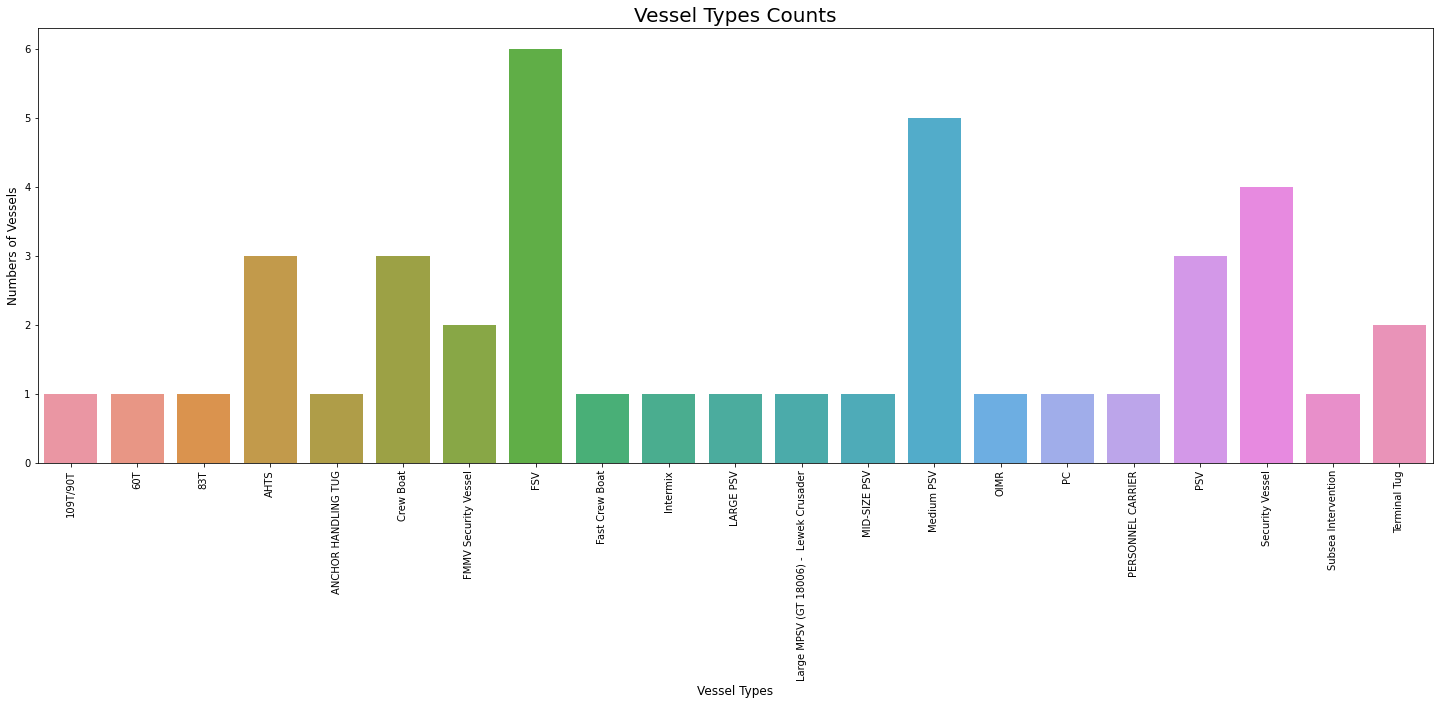

In [27]:
# Visualizations
 
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = (25 , 8))
  
# Plot the barplot
vessel_type = merged_df_copy.groupby(['type']).size()
sns.barplot(x = vessel_type.index, y = vessel_type.values)
  
# Set label for x-axis
ax.set_xlabel( "Vessel Types" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Numbers of Vessels" , size = 12 )
  
# Set title for plot
ax.set_title( "Vessel Types Counts" , size = 20 )

# Set x-axis labels degrees
ax.tick_params(axis='x', rotation=90)

# Display figure
plt.show()


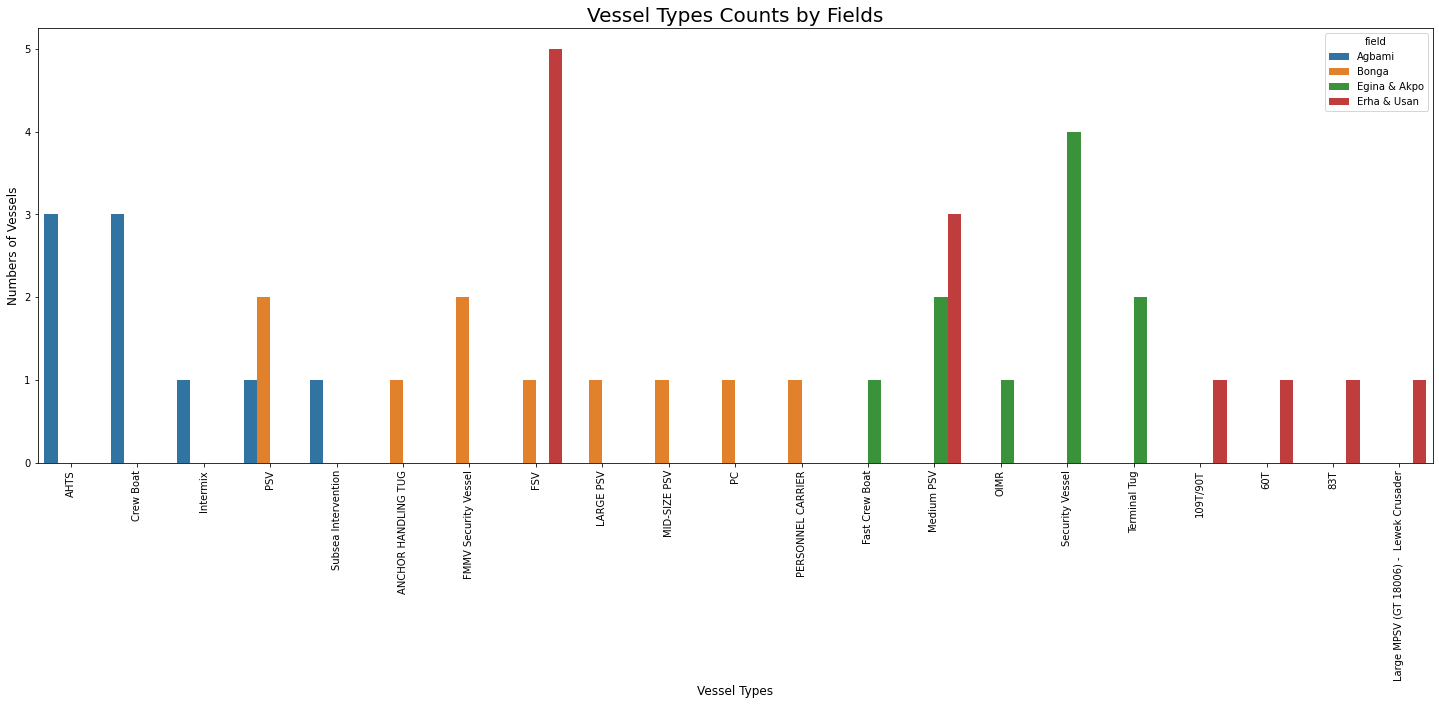

In [28]:
# Visualizations of fields and available vessel types
 
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = (25 , 8))
  
# Plot the barplot
field_vessel_category = merged_df_copy.groupby(['field', 'type']).size().reset_index(name='count')
sns.barplot(x = 'type', y = 'count', hue='field', data=field_vessel_category)
  
# Set label for x-axis
ax.set_xlabel( "Vessel Types" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Numbers of Vessels" , size = 12 )
  
# Set title for plot
ax.set_title( "Vessel Types Counts by Fields" , size = 20 )

# Set x-axis labels degrees
ax.tick_params(axis='x', rotation=90)

# Display figure
plt.show()


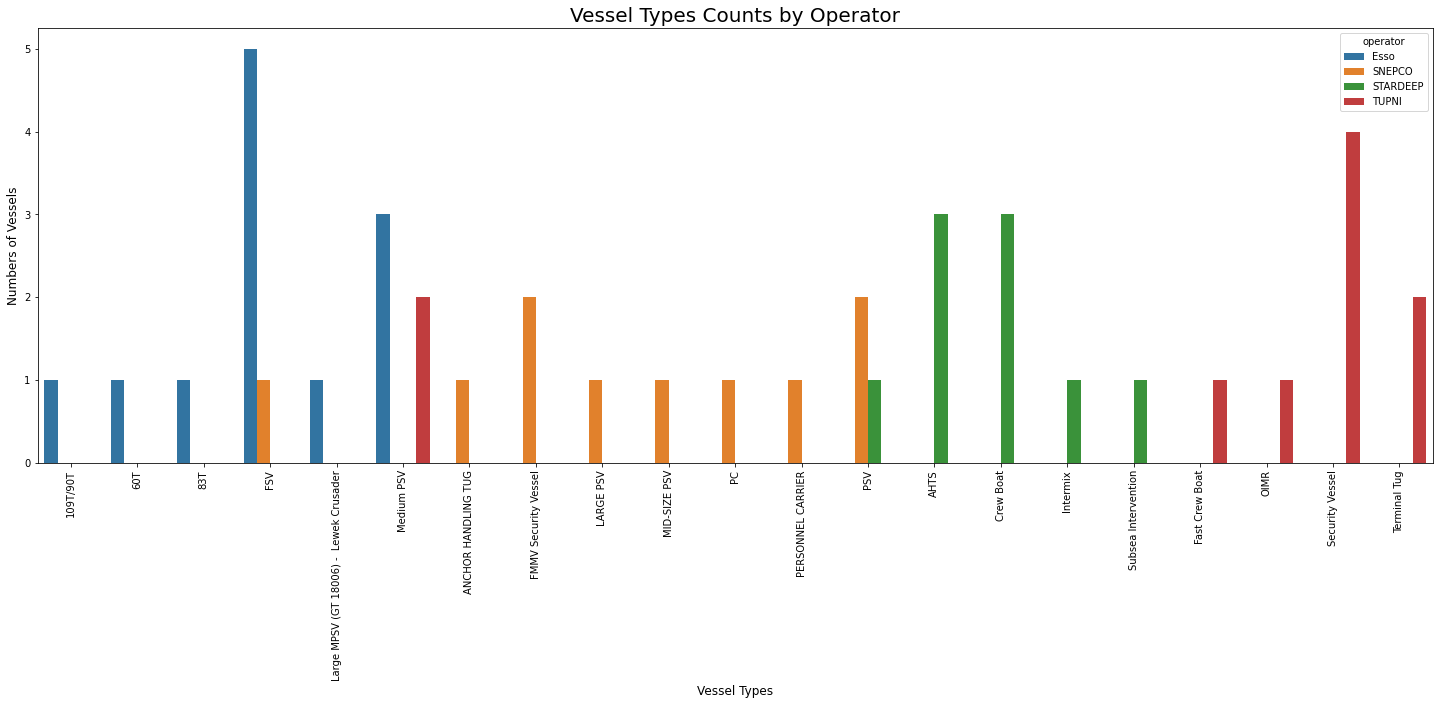

In [29]:
# Visualizations of operators and available vessel types
 
# Set figure size (width, height) in inches
fig, ax = plt.subplots(figsize = (25 , 8))
  
# Plot the barplot
field_vessel_category = merged_df_copy.groupby(['operator', 'type']).size().reset_index(name='count')
sns.barplot(x = 'type', y = 'count', hue='operator', data=field_vessel_category)
  
# Set label for x-axis
ax.set_xlabel( "Vessel Types" , size = 12 )
  
# Set label for y-axis
ax.set_ylabel( "Numbers of Vessels" , size = 12 )
  
# Set title for plot
ax.set_title( "Vessel Types Counts by Operator" , size = 20 )

# Set x-axis labels degrees
ax.tick_params(axis='x', rotation=90)

# Display figure
plt.show()